<a href="https://colab.research.google.com/github/OneNameSam/mlzoomcamp_work/blob/main/Week_3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [46]:
features = ['neighbourhood_group',
'room_type',
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']


In [47]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [48]:
df = pd.read_csv(url)

In [49]:
df.reviews_per_month = df.reviews_per_month.fillna(0)
df.isnull().sum()
df.shape

(48895, 16)

#### Question 1 

In [50]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [51]:
df.neighbourhood_group.mode()

0    Manhattan
dtype: object

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# # Splitting the df into train and test 
# df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
# # Splitting the full train df into train and validation dfs
# df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# df_train = df_train.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
# df_test = df_test.reset_index(drop=True)

In [54]:
# y_train = df_train.price.values 
# y_val = df_val.price.values 
# y_test = df_test.price.values 

In [55]:
# del df_train['price']
# del df_val['price']
# del df_test['price']

#### Question 2 

In [56]:
df_num = df.copy()
df_num = df_num.drop(['neighbourhood_group', 'room_type', 'price'], axis=1)
corrMatrix = df_num.corr()
display (corrMatrix)

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.062747,0.059094,0.138516,-0.114713,0.082731
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.144303,0.172028,0.163732,0.225701,1.000000


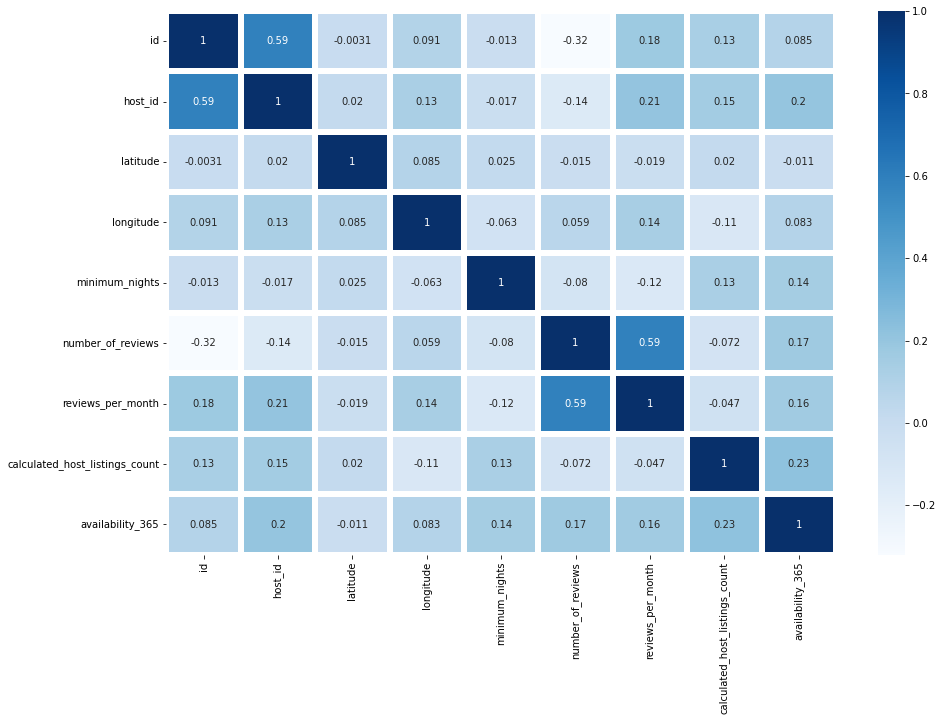

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True, linewidths=5, cmap="Blues")
plt.show()

#df['above_average'] = df.price >= 152 

In [58]:
df_num.corr().unstack().sort_values(ascending=False)

availability_365                availability_365                  1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
host_id                         host_id                           1.000000
latitude                        latitude                          1.000000
longitude                       longitude                         1.000000
                                                                    ...   
reviews_per_month               minimum_nights                   -0.124905
host_id                         number_of_reviews                -0.140106
number_of_reviews               host_id                          -0.140106
                                id                               -0.319760
id                              number_of_reviews                -0.319760
Length: 81, dtype: float64

### Question 3

In [59]:
from sklearn.metrics import mutual_info_score

In [60]:
data_class = df.copy()

mean = data_class.price.mean()
data_class['above_average'] = np.where(data_class['price']>=mean,1,0)
data_class.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0


In [61]:
data_class = data_class.drop(['price'], axis=1)

In [62]:
# Splitting the df into train and test 
df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state=42)
# Splitting the full train df into train and validation dfs
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [63]:
y_train = df_train.above_average.values 
y_val = df_val.above_average.values 
y_test = df_test.above_average.values 

In [64]:

cat = ['neighbourhood_group', 'room_type']
# numerical = ['latitude',
# 'longitude',
# 'minimum_nights',
# 'number_of_reviews',
# 'reviews_per_month',
# 'calculated_host_listings_count',
# 'availability_365']

In [65]:
def mutal_info_churn_score(series):
  return round(mutual_info_score(series, df_train.above_average),2)

In [66]:
mi = df_train[cat].apply(mutal_info_churn_score)
mi.sort_values(ascending=False)

room_type              0.14
neighbourhood_group    0.05
dtype: float64

In [67]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

### Question 4

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score

In [69]:
cat = ['neighbourhood_group', 'room_type']
numerical = ['latitude',
'longitude',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [70]:
train_dicts = df_train[cat + numerical].to_dict(orient='records')

In [71]:
dv = DictVectorizer(sparse=False)

In [72]:
dv.fit(train_dicts)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=False)

In [73]:
X_train = dv.fit_transform(train_dicts)
X_train.shape

(29337, 15)

In [74]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
val_dicts = df_val[cat + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred =model.predict(X_val)

In [76]:
#cross_val_score(y_pred, y_val)
from sklearn.metrics import accuracy_score
accuracy = round((accuracy_score(y_pred, y_val)),2)
accuracy

0.79

### Question 5 

In [77]:
orig_accuracy = accuracy

In [78]:
features = ['neighbourhood_group',
'room_type',
'latitude',
'longitude',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']


In [79]:
for c in features:
  subset = features.copy()
  subset.remove(c)

  train_dicts = df_train[subset].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  dv.fit(train_dicts)

  X_train = dv.fit_transform(train_dicts)
  model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
  model.fit(X_train, y_train)

  val_dicts = df_val[cat + numerical].to_dict(orient='records')
  X_val = dv.transform(val_dicts)
  y_pred =model.predict(X_val)

  accuracy = round((accuracy_score(y_pred, y_val)),2)
  score = accuracy - orig_accuracy
  print (c, score )

neighbourhood_group -0.040000000000000036
room_type -0.08000000000000007
latitude 0.0
longitude 0.0
minimum_nights -0.010000000000000009
number_of_reviews 0.0
reviews_per_month -0.010000000000000009
calculated_host_listings_count 0.0
availability_365 -0.010000000000000009


### Question 6 

In [80]:
data = df.copy()

data['price'] = np.log1p(data['price'])

In [81]:
# Splitting the df into train and test 
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
# Splitting the full train df into train and validation dfs
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [82]:
y_train = df_train.price.values 
y_val = df_val.price.values 
y_test = df_test.price.values 

In [83]:
del df_train['price']
del df_val['price']
del df_test['price']

In [84]:
  train_dicts = df_train[subset].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  dv.fit(train_dicts)

  X_train = dv.fit_transform(train_dicts)
  
  val_dicts = df_val[cat + numerical].to_dict(orient='records')
  X_val = dv.transform(val_dicts)


In [85]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [86]:
for a in [0,0.01, 0.1, 1, 10]:
  model = Ridge(alpha=a, random_state=42)
  model.fit(X_train, y_train)

  y_pred =model.predict(X_val)

  score = np.sqrt(mean_squared_error(y_val, y_pred))

  print (a, round(score, 3))

0 0.506
0.01 0.506
0.1 0.506
1 0.506
10 0.506
